In [36]:
import numpy as np
import pandas as pd
import random
from datetime import datetime, timedelta
from icecream import ic

In [37]:
# Define the time range and frequency
start_time = datetime.now()
end_time = start_time + timedelta(hours=12)
time_range = pd.date_range(start=start_time, end=end_time, freq='S')


In [38]:
len(time_range)

43201

In [39]:
# Initialize lists to store the data
casting_speed = []
sen_depth = []
tundish_temp = []
cooling_water_flow = []
cooling_water_pressure = []
vibration_frequency = []
vibration_amplitude = []
mold_level = []
casting_speed_label = []
mold_level_label = []
sen_depth_label = []
tundish_temp_label = []

# Control target values and ranges
control_targets = {
    'casting_speed': 0.59,
    'mold_level': 85,
    'sen_depth': 120,
    'tundish_temp': 1488
}
ranges = {
    'casting_speed': (0.57, 0.61),
    'mold_level': (82, 88),
    'sen_depth': (110, 130),
    'tundish_temp': (1481, 1496)
}

# Generate data for each second in the time range
for _ in time_range:
    casting_speed.append(np.random.normal(control_targets['casting_speed'], 0.01))
    sen_depth.append(np.random.normal(control_targets['sen_depth'], 0.01))
    tundish_temp.append(np.random.normal(control_targets['tundish_temp'], 0.01))
    cooling_water_flow.append(np.random.uniform(100, 500))
    cooling_water_pressure.append(np.random.uniform(1, 5))
    vibration_frequency.append(50)  # Constant value
    vibration_amplitude.append(0.1)  # Constant value
    mold_level.append(np.random.normal(control_targets['mold_level'], 0.01))
    casting_speed_label.append('normal')
    mold_level_label.append('normal')
    sen_depth_label.append('normal')
    tundish_temp_label.append('normal')


In [40]:
def introduce_anomalies(data, labels, variable, anomaly_type, min_val, max_val, num_anomalies=1):
    for _ in range(num_anomalies):
        if anomaly_type == 'impulse':
            index = random.randint(0, len(data) - 1)
            data[index] = np.random.uniform(min_val, max_val)
            labels[index] = 'impulse'
        elif anomaly_type == 'step':
            start_index = random.randint(0, len(data) - 1000)
            step_value = np.random.uniform(min_val, max_val)
            for i in range(start_index, start_index + 1000):
                data[i] = step_value
                labels[i] = 'step'
        elif anomaly_type == 'slow-varying':
            start_index = random.randint(0, len(data) - 1000)
            for i in range(start_index, start_index + 1000):
                data[i] = np.random.uniform(min_val, max_val)
                labels[i] = 'slowvarying'

# Introduce anomalies in the data
num_anomalies_per_type = 50  # Introduce 5 anomalies of each type
for variable in ['casting_speed', 'mold_level', 'sen_depth', 'tundish_temp']:
    for anomaly_type in ['impulse', 'step', 'slow-varying']:
        introduce_anomalies(locals()[variable], locals()[f'{variable}_label'], variable, anomaly_type, ranges[variable][0], ranges[variable][1], num_anomalies=num_anomalies_per_type)

In [41]:
# def introduce_anomalies(data, labels, variable, anomaly_type, min_val, max_val):
#     if anomaly_type == 'impulse':
#         index = random.randint(0, len(data) - 1)
#         data[index] = np.random.uniform(min_val, max_val)
#         labels[index] = 'impulse'
#     elif anomaly_type == 'step':
#         start_index = random.randint(0, len(data) - 1000)
#         step_value = np.random.uniform(min_val, max_val)
#         for i in range(start_index, start_index + 1000):
#             data[i] = step_value
#             labels[i] = 'step'
#     elif anomaly_type == 'slow-varying':
#         start_index = random.randint(0, len(data) - 1000)
#         for i in range(start_index, start_index + 1000):
#             data[i] = np.random.uniform(min_val, max_val)
#             labels[i] = 'slowvarying'

In [42]:
# # Introduce anomalies in the data
# for variable in ['casting_speed', 'mold_level', 'sen_depth', 'tundish_temp']:
#     for anomaly_type in ['impulse', 'step', 'slow-varying']:
#         introduce_anomalies(locals()[variable], locals()[f'{variable}_label'], variable, anomaly_type, ranges[variable][0], ranges[variable][1])

In [43]:
data = {
    'Timestamp': time_range,
    'Casting_Speed': casting_speed,
    'SEN_Depth': sen_depth,
    'Tundish_Temperature': tundish_temp,
    'Cooling_Water_Flow': cooling_water_flow,
    'Cooling_Water_Pressure': cooling_water_pressure,
    'Vibration_Frequency': vibration_frequency,
    'Vibration_Amplitude': vibration_amplitude,
    'Mold_Level': mold_level,
    'Casting_Speed_Label': casting_speed_label,
    'Mold_Level_Label': mold_level_label,
    'SEN_Depth_Label': sen_depth_label,
    'Tundish_Temperature_Label': tundish_temp_label
}
df = pd.DataFrame(data)


In [44]:
df

,Timestamp,Casting_Speed,SEN_Depth,Tundish_Temperature,Cooling_Water_Flow,Cooling_Water_Pressure,Vibration_Frequency,Vibration_Amplitude,Mold_Level,Casting_Speed_Label,Mold_Level_Label,SEN_Depth_Label,Tundish_Temperature_Label
0,2024-10-15 22:23:49.451838,0.593451,120.002201,1488.012536,202.042309,3.407399,50,0.1,84.997089,normal,normal,normal,normal
1,2024-10-15 22:23:50.451838,0.603478,120.018840,1487.990430,227.741523,3.918192,50,0.1,84.999316,normal,normal,normal,normal
2,2024-10-15 22:23:51.451838,0.586768,120.013293,1488.006141,448.395896,3.838335,50,0.1,85.017457,normal,normal,normal,normal
3,2024-10-15 22:23:52.451838,0.591977,120.012001,1487.999635,269.467407,3.477535,50,0.1,84.983261,normal,normal,normal,normal
4,2024-10-15 22:23:53.451838,0.586248,120.004812,1488.000107,274.802607,2.057261,50,0.1,85.015921,normal,normal,normal,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43196,2024-10-16 10:23:45.451838,0.604907,122.649469,1487.987356,319.166573,4.176370,50,0.1,85.005929,normal,normal,step,normal
43197,2024-10-16 10:23:46.451838,0.589919,122.649469,1487.995415,415.776058,4.951875,50,0.1,84.988858,normal,normal,step,normal
43198,2024-10-16 10:23:47.451838,0.581603,120.000212,1487.999595,405.694045,2.053965,50,0.1,84.999855,normal,normal,normal,normal
43199,2024-10-16 10:23:48.451838,0.575161,119.994632,1488.000983,348.709443,3.062501,50,0.1,85.011649,normal,normal,normal,normal


In [45]:
# Save the DataFrame to a CSV file
df.to_csv('data.csv', index=False)

In [46]:
df['Casting_Speed_Label'].unique()

array(['normal', 'slowvarying', 'step', 'impulse'], dtype=object)

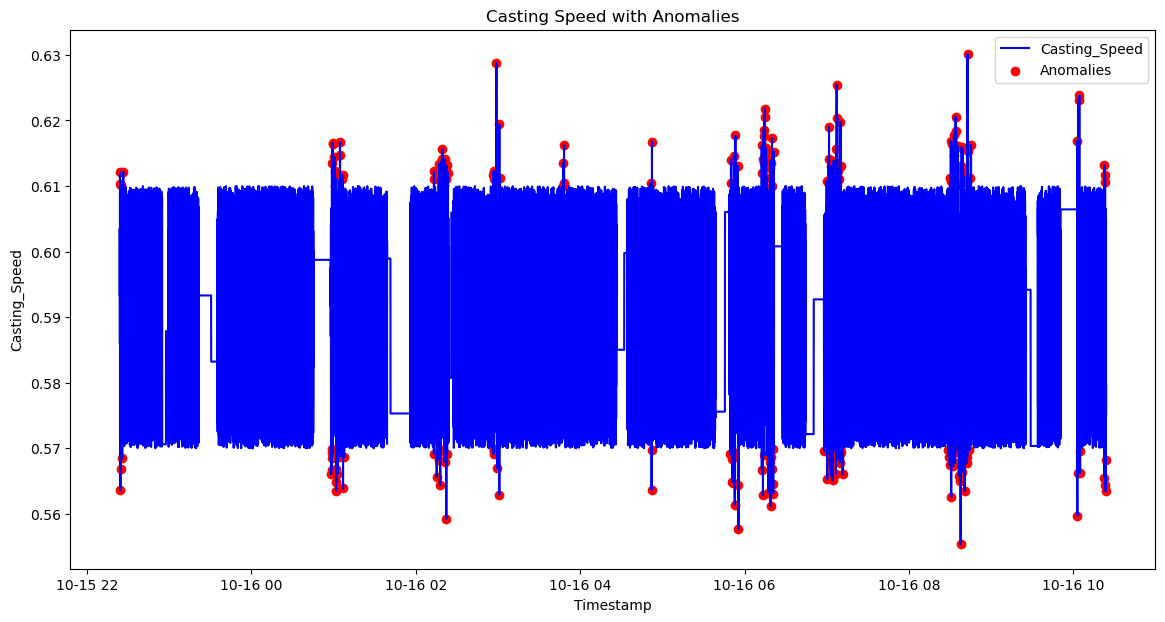

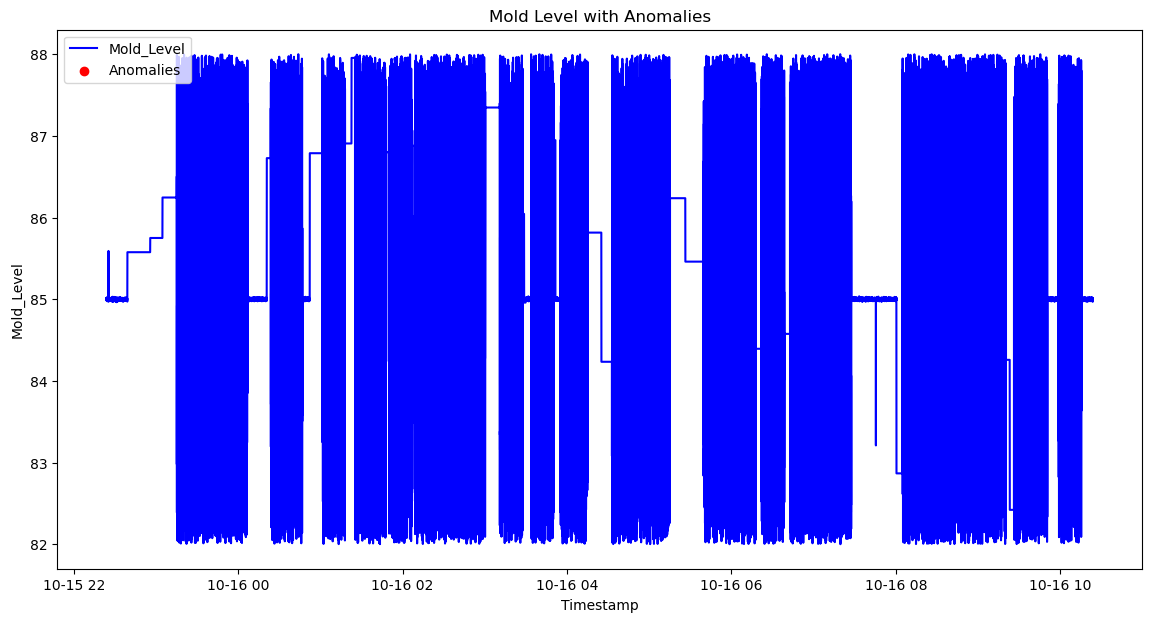

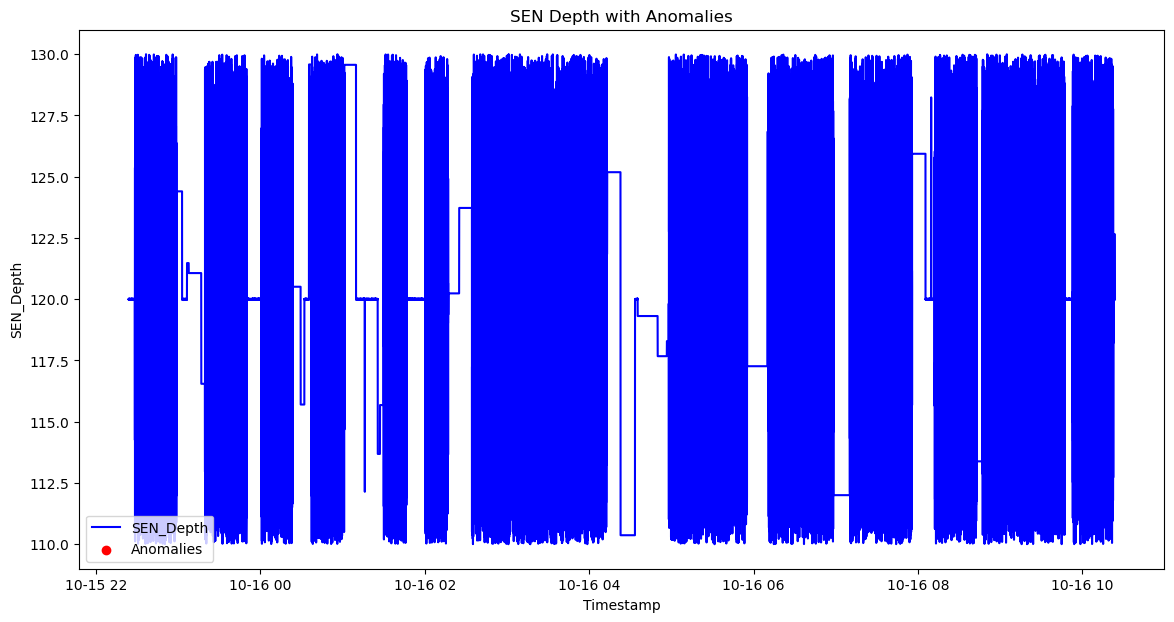

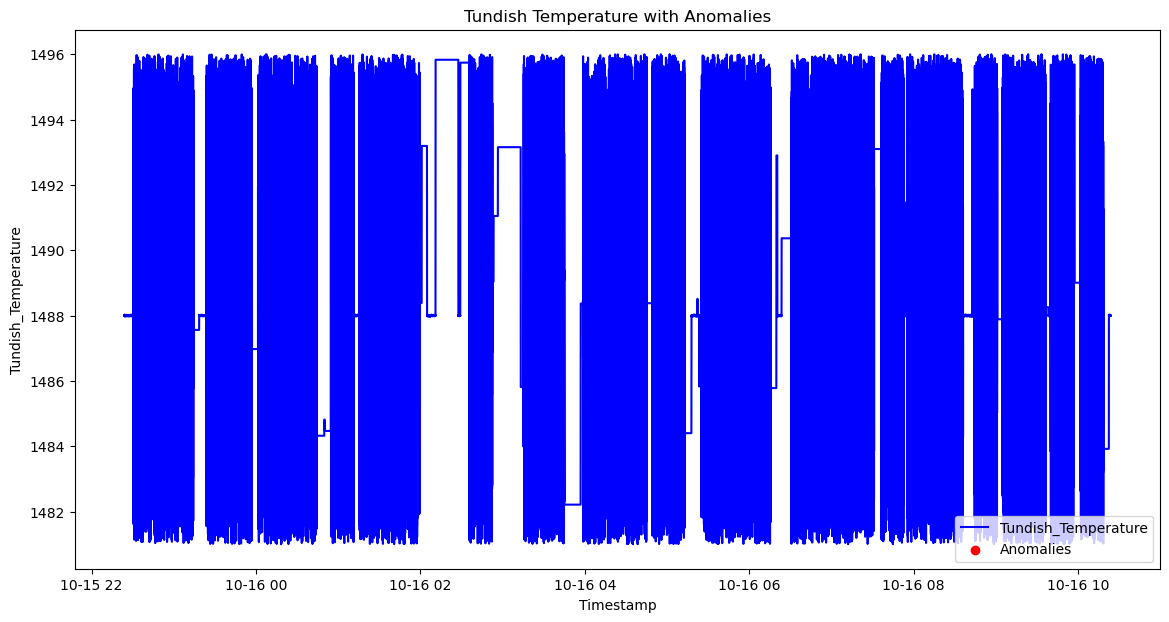

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Load the dataset
df = pd.read_csv('data.csv', parse_dates=['Timestamp'])

# Function to plot time series data with anomalies
def plot_time_series_with_anomalies(df, variable, title):
    plt.figure(figsize=(14, 7))
    plt.plot(df['Timestamp'], df[variable], label=variable, color='blue')
    
    # Highlight anomalies
    anomalies = df[(df[variable] < ranges[variable][0]) | (df[variable] > ranges[variable][1])]
    plt.scatter(anomalies['Timestamp'], anomalies[variable], color='red', label='Anomalies')
    
    plt.title(title)
    plt.xlabel('Timestamp')
    plt.ylabel(variable)
    plt.legend()
    plt.show()

# Define the ranges for anomalies
ranges = {
    'Casting_Speed': (0.57, 0.61),
    'Mold_Level': (82, 88),
    'SEN_Depth': (110, 130),
    'Tundish_Temperature': (1481, 1496)
}

# Plot each variable with anomalies
plot_time_series_with_anomalies(df, 'Casting_Speed', 'Casting Speed with Anomalies')
plot_time_series_with_anomalies(df, 'Mold_Level', 'Mold Level with Anomalies')
plot_time_series_with_anomalies(df, 'SEN_Depth', 'SEN Depth with Anomalies')
plot_time_series_with_anomalies(df, 'Tundish_Temperature', 'Tundish Temperature with Anomalies')
